# Import Packages

In [1]:
import numpy as np
import SimpleITK as sitk
import matplotlib.pyplot as plt

from tureplicator.replicate import TumorReplicator
%matplotlib inline

# Obtain Tumor and Mask Arrays

In [2]:
tumor_filepath = "../tumor.nii"
mask_filepath = "../tumor_mask.nii"

tumor_arr = sitk.GetArrayFromImage(sitk.ReadImage(tumor_filepath))
mask_arr = sitk.GetArrayFromImage(sitk.ReadImage(mask_filepath))

chosen_channel = [i for i in range(len(mask_arr)) if mask_arr[i, :, :].max()==1] # there is only one channel with mask annotated
assert len(chosen_channel) == 1
chosen_channel = chosen_channel[0]

tumor = tumor_arr[chosen_channel, :, :]
mask = mask_arr[chosen_channel, :, :]

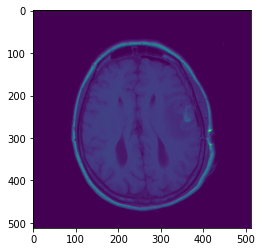

In [3]:
plt.imshow(tumor)
# plt.savefig("tumor.png")

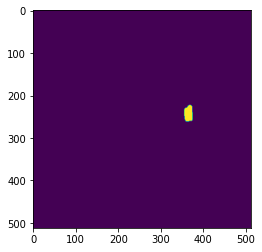

In [4]:
plt.imshow(mask)
# plt.savefig("mask.png")

# Generate New Tumor

In [5]:
r = TumorReplicator(tumor_box_size=50, skull_threshold=190, outer_erosion=50, inner_erosion=5,
                   spawn_tol=0.6, overlap_range=(0.4,0.5), dist_transform_mask_size=5, dist_transform_scalar=1.5,
                   seed=42)

In [6]:
result = r.generate(tumor, mask)

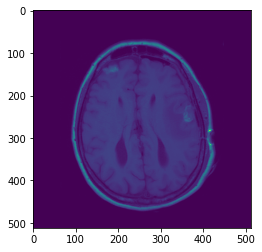

In [7]:
plt.imshow(result)
# plt.savefig("result.png")